# Inspecting Iodine molecule spectre

In [1]:
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import matplotlib.pyplot as plt
import seaborn as sns

## Импортируем данные
Данные разделены на два DataFrame: `data` и `data_long`.

`data_long` содержит данные одного эксперимента: расширенный диапазон длин волн:
от 340 до 700 нм

`data` содержит совокупные данные остальных экспериментов в длинной форме.

Столбцы Фреймов:
- `Wavelength` [float] - длина волны, абсцисса измерений, **в нм**
- `Transmission` [float] - пропускание, ордината измерений, **в %**
- `Temperature` [int] - температура капсулы с иодом, при которых проводились измерения, **в градусах Цельсия**. *Примечание: возможно на 1-2 градуса отличается от реальных значений температуры.*
- `Slit` [float] - толщина щели интерферометра, **в нм (или мкм?)**

In [2]:
data = pd.DataFrame(columns=['Wavelength', 'Transmission'])
for name in ('40', '50', '60'):
    df = pd.read_csv(
        name+'.dat', sep=' ', skiprows=1, decimal=','
    )[['nm', '%']].rename({'nm': 'Wavelength', '%': 'Transmission'}, axis=1)
    df['Temperature'] = int(name)
    df['Slit'] = 0.1
    data = pd.concat((data, df), axis=0)
for name in ('0.1', '0.5', '1', '5'):
    df = pd.read_csv(
        '70 ' + name + '.dat', sep=' ', skiprows=1, decimal=','
    )[['nm', '%']].rename({'nm': 'Wavelength', '%': 'Transmission'}, axis=1)
    df['Temperature'] = 70
    df['Slit'] = float(name)
    data = pd.concat((data, df), axis=0)
data_long = pd.read_csv(
        '70 340-700.dat', sep=' ', skiprows=1, decimal=','
    )[['nm', '%']].rename({'nm': 'Wavelength', '%': 'Transmission'}, axis=1)
data_long['Temperature'] = 70
data_long['Slit'] = 0.1
del df
data.head()


,Wavelength,Transmission,Temperature,Slit
0,480.0,69.243546,40.0,0.1
1,480.2,69.101525,40.0,0.1
2,480.4,69.233954,40.0,0.1
3,480.6,69.150352,40.0,0.1
4,480.8,69.139163,40.0,0.1


## Строим полученные спектры
Строим зависимости пропускания `Transmission` от длины волны `Wavelength`

<Axes: xlabel='Wavelength', ylabel='Transmission'>

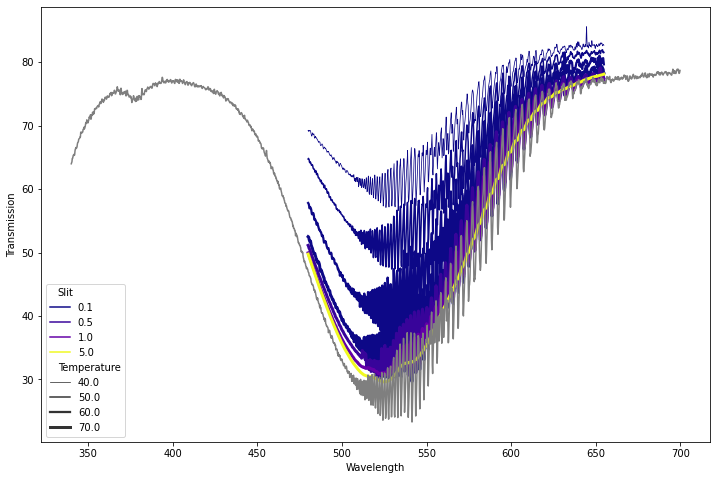

In [3]:
funny = [(i, 0.1) for i in range(40, 71, 10)] + [(70, i) for i in (0.5, 1, 5)]
plt.figure(figsize=(12, 8))
sns.lineplot(
    data = data,
    x = 'Wavelength',
    y = 'Transmission',
    size = 'Temperature',
    hue = 'Slit',
    palette='plasma'
)
sns.lineplot(data_long, x='Wavelength', y='Transmission')

## Выбираем в спектрах локальные максимумы
С помощью функции `argrelextrema` находим верхние и нижние пики на спектре.

Поиск пиков происходит в диапазоне длин волн от 505 до 630 нм.
Данные сохраняются в DataFrame `df`

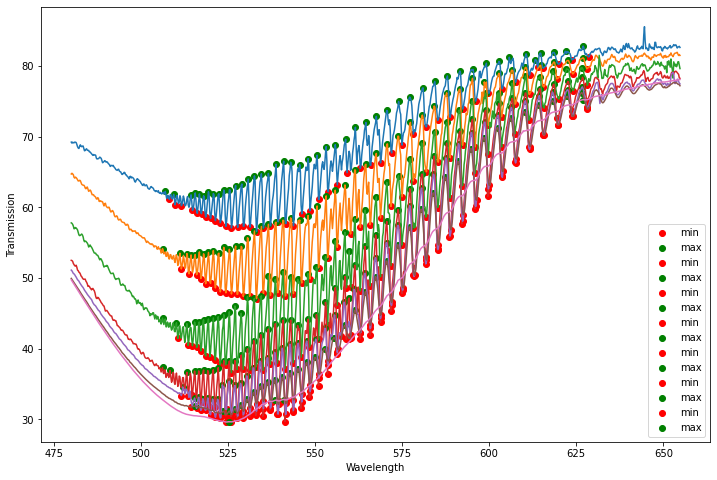

In [6]:
from scipy.signal import argrelextrema

n = 5  # number of points to be checked before and after
plt.figure(figsize=(12, 8))

for temp, slit in funny:
    df = data[(data['Temperature'] == temp) & (data['Slit'] == slit)]

    df['min'] = df.loc[argrelextrema(df['Transmission'].values, np.less_equal,
                        order=n)[0]]['Transmission'][
        (df['Wavelength'] > 505) & (df['Wavelength'] < 630)
    ]
    df['max'] = df.loc[argrelextrema(df['Transmission'].values, np.greater_equal,
                        order=n)[0]]['Transmission'][
        (df['Wavelength'] > 505) & (df['Wavelength'] < 630)
    ]
    plt.scatter(data = df, x='Wavelength', y='min', c='r')
    plt.scatter(data = df, x='Wavelength', y='max', c='g')
    sns.lineplot(data = df, x='Wavelength', y='Transmission')

# Plot results